In [229]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
smarket = pd.read_csv("Smarket.csv")

smarket.rename(columns={smarket.columns[0]:'Seq_no'}, inplace=True)

smarket.drop(columns=['Seq_no'], inplace=True)

smarket.shape
smarket.dtypes
smarket.head()
smarket.tail()

(1250, 9)

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1249,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


In [13]:
# Summary stats

smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [14]:
# Median

smarket.median()

Year      2003.00000
Lag1         0.03900
Lag2         0.03900
Lag3         0.03850
Lag4         0.03850
Lag5         0.03850
Volume       1.42295
Today        0.03850
dtype: float64

In [15]:
# Correlations

# college.iloc[:,2:12].corr()

smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


[Text(0,0,'Year'),
 Text(0,0,'Lag1'),
 Text(0,0,'Lag2'),
 Text(0,0,'Lag3'),
 Text(0,0,'Lag4'),
 Text(0,0,'Lag5'),
 Text(0,0,'Volume'),
 Text(0,0,'Today'),
 Text(0,0,'Direction')]

[Text(0,0,'Year'),
 Text(0,0,'Lag1'),
 Text(0,0,'Lag2'),
 Text(0,0,'Lag3'),
 Text(0,0,'Lag4'),
 Text(0,0,'Lag5'),
 Text(0,0,'Volume'),
 Text(0,0,'Today'),
 Text(0,0,'Direction')]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

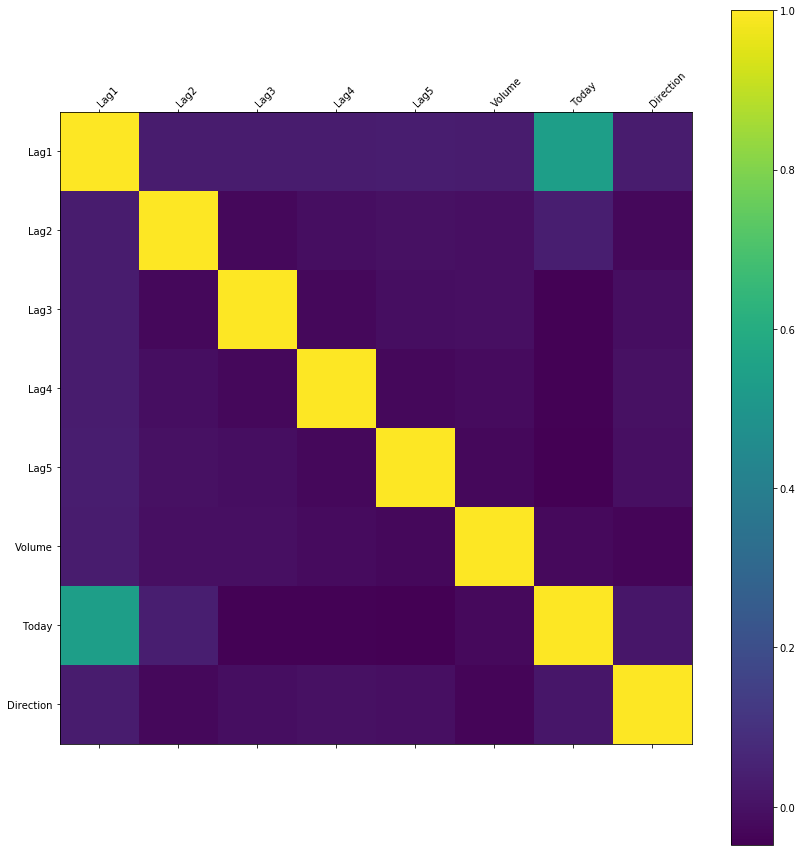

In [16]:
corr_matrix = smarket.corr()
corr_names = smarket.columns.values

fig = plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.set_xticks(np.arange(len(list(corr_names))))
ax.set_xticklabels(list(corr_names))
ax.set_yticks(np.arange(len(list(corr_names))))
ax.set_yticklabels(list(corr_names))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Rotate and align top ticklabels
plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=45, ha="left", va="center",rotation_mode="anchor")

im = ax.matshow(corr_matrix, interpolation='none')
fig.colorbar(im)
fig.tight_layout()
plt.show()

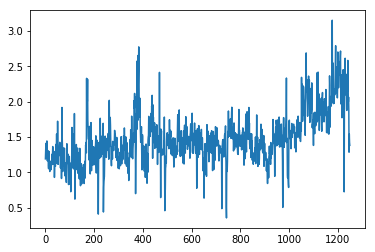

In [17]:
plt.plot(smarket['Volume'])

## Split into training and test datasets

In [56]:
# Create binary output variable

smarket['Y'] = np.where( smarket['Direction']=='Up', 1, 0 )

smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Y
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [134]:
smarket_train = smarket.loc[ smarket['Year']<2005 ]
smarket_test = smarket.loc[ smarket['Year']>=2005 ]

smarket_train.shape
smarket_test.shape

smarket_train.head()

smarket_test.head()

(998, 10)

(252, 10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Y
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Y
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down,0
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down,0
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down,0
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up,1
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down,0


### Fit simple logictic regression model

In [152]:
# StatsModel, to get full model summary output

# x_train = smarket_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
x_train = smarket_train[['Lag1', 'Lag2']]
y_train = smarket_train['Y']

# x_test = smarket_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
x_test = smarket_test[['Lag1', 'Lag2']]
y_test = smarket_test['Y']


x2 = sm.add_constant(x_train)

# logit = sm.Logit(y, x)
# logit.fit().params

logit_model=sm.Logit(y_train, x2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.001    
Dependent Variable: Y                AIC:              1387.4021
Date:               2019-05-14 09:54 BIC:              1402.1193
No. Observations:   998              Log-Likelihood:   -690.70  
Df Model:           2                LL-Null:          -691.63  
Df Residuals:       995              LLR p-value:      0.39393  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const      0.0322     0.0634    0.5084   0.6112   -0.0920   0.1564
Lag1      -0.0556     0.0517   -1.0757   0.2820   -0.1570   0.0457
Lag

In [153]:
# Fit simple logistic regression model: modelling Direction as a function of Lag1+Lag2+Lag3+Lag4+Lag5+Volume

# x_train = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
# y = smarket['Direction']
# y = smarket['Y']

# Create linear regression object
logistic = LogisticRegression()

# Train the model using the training sets
logistic.fit(x_train, y_train)

print('Coefficients: ')
print('Intercept: ', logistic.intercept_)
for ind, coef in enumerate(np.transpose(logistic.coef_)):
      print(list(x)[ind], coef)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Coefficients: 
Intercept:  [0.03208806]
Lag1 [-0.05546958]
Lag2 [-0.04436457]


In [155]:
# Output coefficients in nicer format

coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)

coefficients

,0,0
0,Lag1,-0.055470
1,Lag2,-0.044365


In [156]:
# Predicting the test set results and calculating the accuracy

y_pred_class = logistic.predict(x_test)

y_pred_prob = logistic.predict_proba(x_test)


print('\nPredicted Class first 10 obs: ', y_pred_class[0:10])
print('\nPredicted Probabilities first 10 obs: ', y_pred_prob[0:10])

print('\nAccuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(x_test, y_test)))




Predicted Class first 10 obs:  [1 1 1 1 1 1 1 1 1 1]

Predicted Probabilities first 10 obs:  [[0.49020973 0.50979027]
 [0.47924338 0.52075662]
 [0.46683748 0.53316252]
 [0.47402416 0.52597584]
 [0.49281985 0.50718015]
 [0.49388824 0.50611176]
 [0.49513475 0.50486525]
 [0.48731477 0.51268523]
 [0.49073267 0.50926733]
 [0.48442973 0.51557027]]

Accuracy of logistic regression classifier on test set: 0.56


In [157]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_class)

print(confusion)

[[ 35  76]
 [ 35 106]]


In [158]:
y_actual_pred_df = pd.DataFrame(y_test)
y_actual_pred_df['y_pred'] = y_pred_class

# y_actual_pred_df.head()

pd.crosstab(y_actual_pred_df['Y'], y_actual_pred_df['y_pred'])

y_pred,0,1
Y,,
0,35,76
1,35,106


In [146]:
# Classification Report

print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.44      0.64      0.52       111
          1       0.57      0.37      0.45       141

avg / total       0.51      0.49      0.48       252



In [228]:
# Function to calculate Confusion Matrix Metrics

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    y_actual = list(y_actual)
    y_hat = list(y_hat)
    
    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    print('True Positives = ', TP)
    print('True Negatives = ', TN)
    print('False Positives = ', FP)
    print('False Negatives = ', FN)
    
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    accuracy = (TP+TN) / (TP + FP + TN + FN)

    print('\nAccuracy (% of all cases predicted correctly) = ', round(accuracy, 3))
    print('Recall (% of actual positives the model got right) = ', round(recall, 3))
    print('Precision (% of positive predictions the model got right) = ', round(precision, 3))
    
perf_measure(y_test, y_pred_class)

True Positives =  121
True Negatives =  30
False Positives =  81
False Negatives =  20

Accuracy (% of all cases predicted correctly) =  0.599
Recall (% of actual positives the model got right) =  0.858
Precision (% of postive predictions the model got right) =  0.599


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

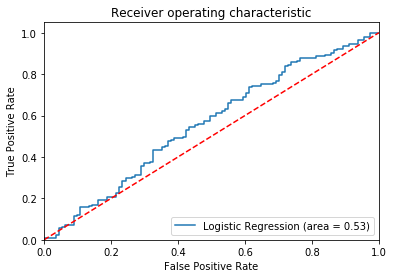

In [159]:
# ROC (Receiver Operating Characteristic) Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_class)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [165]:
# Predict specific values

logistic.predict_proba([[1.2, 1.1]])
logistic.predict([[1.2, 1.1]])

logistic.predict_proba([[1.5, -0.8]])
logistic.predict([[1.5, -0.8]])

logistic.predict_proba([[-0.7, 1.4]])
logistic.predict([[-0.7, 1.4]])

array([[0.52080709, 0.47919291]])

array([0])

array([[0.50390608, 0.49609392]])

array([0])

array([[0.49779842, 0.50220158]])

array([1])

# Linear Discriminant Analysis

In [167]:
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [201]:
# Prior Probabilities
prior_counts = pd.DataFrame(y_train).groupby('Y').size()
prior_probs = pd.DataFrame(prior_counts)
prior_probs.columns = ['Value']
prior_probs['Prior Probability'] = prior_probs['Value'] / prior_probs['Value'].sum()

prior_probs

# Group Means
smarket.groupby('Y').mean()

,Value,Prior Probability
Y,,
0,491,0.491984
1,507,0.508016


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Y,,,,,,,,
0,2002.906977,0.050686,0.032297,-0.005525,-0.003342,-0.000844,1.469728,-0.857814
1,2003.117284,-0.039691,-0.022444,0.008443,0.006261,0.011605,1.486273,0.802974


In [168]:
# Output coefficients in nicer format

coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lda.coef_))], axis = 1)

coefficients

,0,0
0,Lag1,-0.055441
1,Lag2,-0.044345


In [169]:
# Predicting the test set results and calculating the accuracy

y_pred_class = lda.predict(x_test)
y_pred_prob = lda.predict_proba(x_test)

print('\nPredicted Class first 10 obs: ', y_pred_class[0:10])
print('\nPredicted Probabilities first 10 obs: ', y_pred_prob[0:10])

print('\nAccuracy of LDA classifier on test set: {:.2f}'.format(lda.score(x_test, y_test)))


Predicted Class first 10 obs:  [1 1 1 1 1 1 1 1 1 1]

Predicted Probabilities first 10 obs:  [[0.49017925 0.50982075]
 [0.4792185  0.5207815 ]
 [0.46681848 0.53318152]
 [0.47400107 0.52599893]
 [0.49278766 0.50721234]
 [0.49385615 0.50614385]
 [0.49510156 0.50489844]
 [0.4872861  0.5127139 ]
 [0.49070135 0.50929865]
 [0.48440262 0.51559738]]

Accuracy of LDA classifier on test set: 0.56


In [172]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

y_actual_pred_df = pd.DataFrame(y_test)
y_actual_pred_df['y_pred'] = y_pred_class

pd.crosstab(y_actual_pred_df['Y'], y_actual_pred_df['y_pred'])

[[ 35  76]
 [ 35 106]]


y_pred,0,1
Y,,
0,35,76
1,35,106


In [173]:
# Classification Report

print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.50      0.32      0.39       111
          1       0.58      0.75      0.66       141

avg / total       0.55      0.56      0.54       252



# Quadratic Discriminant Analysis

In [239]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train, y_train)

# Prior Probabilities
prior_counts = pd.DataFrame(y_train).groupby('Y').size()
prior_probs = pd.DataFrame(prior_counts)
prior_probs.columns = ['Value']
prior_probs['Prior Probability'] = prior_probs['Value'] / prior_probs['Value'].sum()

prior_probs

# Group Means
smarket.groupby('Y').mean()



# Predicting the test set results and calculating the accuracy
y_pred_class = qda.predict(x_test)
y_pred_prob = qda.predict_proba(x_test)

print('\nPredicted Class first 10 obs: ', y_pred_class[0:10])
print('\nPredicted Probabilities first 10 obs: ', y_pred_prob[0:10])

print('\nAccuracy of QDA classifier on test set: {:.2f}'.format(qda.score(x_test, y_test)))



# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

y_actual_pred_df = pd.DataFrame(y_test)
y_actual_pred_df['y_pred'] = y_pred_class

pd.crosstab(y_actual_pred_df['Y'], y_actual_pred_df['y_pred'])



# Classification Report
print(classification_report(y_test, y_pred_class))

perf_measure(y_test, y_pred_class)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

,Value,Prior Probability
Y,,
0,491,0.491984
1,507,0.508016


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Y,,,,,,,,
0,2002.906977,0.050686,0.032297,-0.005525,-0.003342,-0.000844,1.469728,-0.857814
1,2003.117284,-0.039691,-0.022444,0.008443,0.006261,0.011605,1.486273,0.802974



Predicted Class first 10 obs:  [1 1 1 1 1 1 1 1 1 1]

Predicted Probabilities first 10 obs:  [[0.48732434 0.51267566]
 [0.47590106 0.52409894]
 [0.46369106 0.53630894]
 [0.4739253  0.5260747 ]
 [0.49034262 0.50965738]
 [0.49135613 0.50864387]
 [0.49229512 0.50770488]
 [0.48474475 0.51525525]
 [0.48895945 0.51104055]
 [0.48189708 0.51810292]]

Accuracy of QDA classifier on test set: 0.60
[[ 30  81]
 [ 20 121]]


y_pred,0,1
Y,,
0,30,81
1,20,121


             precision    recall  f1-score   support

          0       0.60      0.27      0.37       111
          1       0.60      0.86      0.71       141

avg / total       0.60      0.60      0.56       252

True Positives =  121
True Negatives =  30
False Positives =  81
False Negatives =  20

Accuracy (% of all cases predicted correctly) =  0.599
Recall (% of actual positives the model got right) =  0.858
Precision (% of postive predictions the model got right) =  0.599


# K Nearest Neighbours

In [236]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [237]:
# Predicting the test set results and calculating the accuracy
y_pred_class = neigh.predict(x_test)
y_pred_prob = neigh.predict_proba(x_test)

print('\nPredicted Class first 10 obs: ', y_pred_class[0:10])
print('\nPredicted Probabilities first 10 obs: ', y_pred_prob[0:10])

print('\nAccuracy of KNN classifier on test set: {:.2f}'.format(neigh.score(x_test, y_test)))


Predicted Class first 10 obs:  [0 0 0 1 1 0 1 0 1 1]

Predicted Probabilities first 10 obs:  [[0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]

Accuracy of KNN classifier on test set: 0.53


In [238]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

y_actual_pred_df = pd.DataFrame(y_test)
y_actual_pred_df['y_pred'] = y_pred_class

pd.crosstab(y_actual_pred_df['Y'], y_actual_pred_df['y_pred'])



# Classification Report
print(classification_report(y_test, y_pred_class))

perf_measure(y_test, y_pred_class)

[[48 63]
 [55 86]]


y_pred,0,1
Y,,
0,48,63
1,55,86


             precision    recall  f1-score   support

          0       0.47      0.43      0.45       111
          1       0.58      0.61      0.59       141

avg / total       0.53      0.53      0.53       252

True Positives =  86
True Negatives =  48
False Positives =  63
False Negatives =  55

Accuracy (% of all cases predicted correctly) =  0.532
Recall (% of actual positives the model got right) =  0.61
Precision (% of postive predictions the model got right) =  0.577
